In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [10]:
df = pd.read_csv('data/train.csv')

#### Feature Selection - First Cut
##### Drop:  PassengerId, Survived , Name, Cabin, Embarked, Ticket
##### Keep: Pclass, Sex, Age, SibSp, Parch, Fare

In [128]:
features = df.drop(['PassengerId','Survived','Name','Ticket','Cabin','Embarked'], axis=1)
features_with_ages = features.loc[features['Age'].notnull(),['Pclass','Sex','Age','SibSp','Parch','Fare']]
features_with_ages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
Pclass    714 non-null int64
Sex       714 non-null object
Age       714 non-null float64
SibSp     714 non-null int64
Parch     714 non-null int64
Fare      714 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.0+ KB


In [18]:
features_with_ages.describe()

,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,20.125000,0.000000,0.000000,8.050000
50%,2.000000,28.000000,0.000000,0.000000,15.741700
75%,3.000000,38.000000,1.000000,1.000000,33.375000
max,3.000000,80.000000,5.000000,6.000000,512.329200


28.0


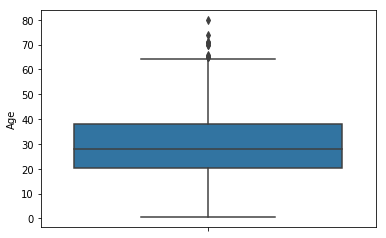

In [126]:
# plot age distributions for non-missing age data
age = features_with_ages['Age']
print(np.median(age))
ax = sns.boxplot(age, orient="v")



In [145]:
# sns.boxplot(x="Pclass", y="Age", data =features_with_ages)
p1_ages = features_with_ages[features_with_ages['Pclass']==1]['Age']
p2_ages = features_with_ages[features_with_ages['Pclass']==2]['Age']
p3_ages = features_with_ages[features_with_ages['Pclass']==3]['Age']
print("Median age of P1 class: ",np.median(p1_ages))
print("Mean age of P1 class: ",np.mean(p1_ages))
print("Median age of P2 class: ",np.median(p2_ages))
print("Mean age of P2 class: ",np.mean(p2_ages))
print("Median age of P3 class: ",np.median(p3_ages))
print("Mean age of P3 class: ",np.mean(p3_ages))

print("P1 passengers=", p1_ages.shape[0])
print("P2 passengers=", p2_ages.shape[0])
print("P3 passengers=", p3_ages.shape[0])

Meadian age of P1 class:  37.0
Mean age of P1 class:  38.233440860215055
Meadian age of P2 class:  29.0
Mean age of P2 class:  29.87763005780347
Meadian age of P3 class:  24.0
Mean age of P3 class:  25.14061971830986
P1 passengers= 186
P2 passengers= 173
P3 passengers= 355


In [21]:
features_with_ages.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
6,1,male,54.0,0,0,51.8625
7,3,male,2.0,3,1,21.0750
8,3,female,27.0,0,2,11.1333
9,2,female,14.0,1,0,30.0708
10,3,female,4.0,1,1,16.7000


In [23]:
numeric_features = pd.get_dummies(features_with_ages)

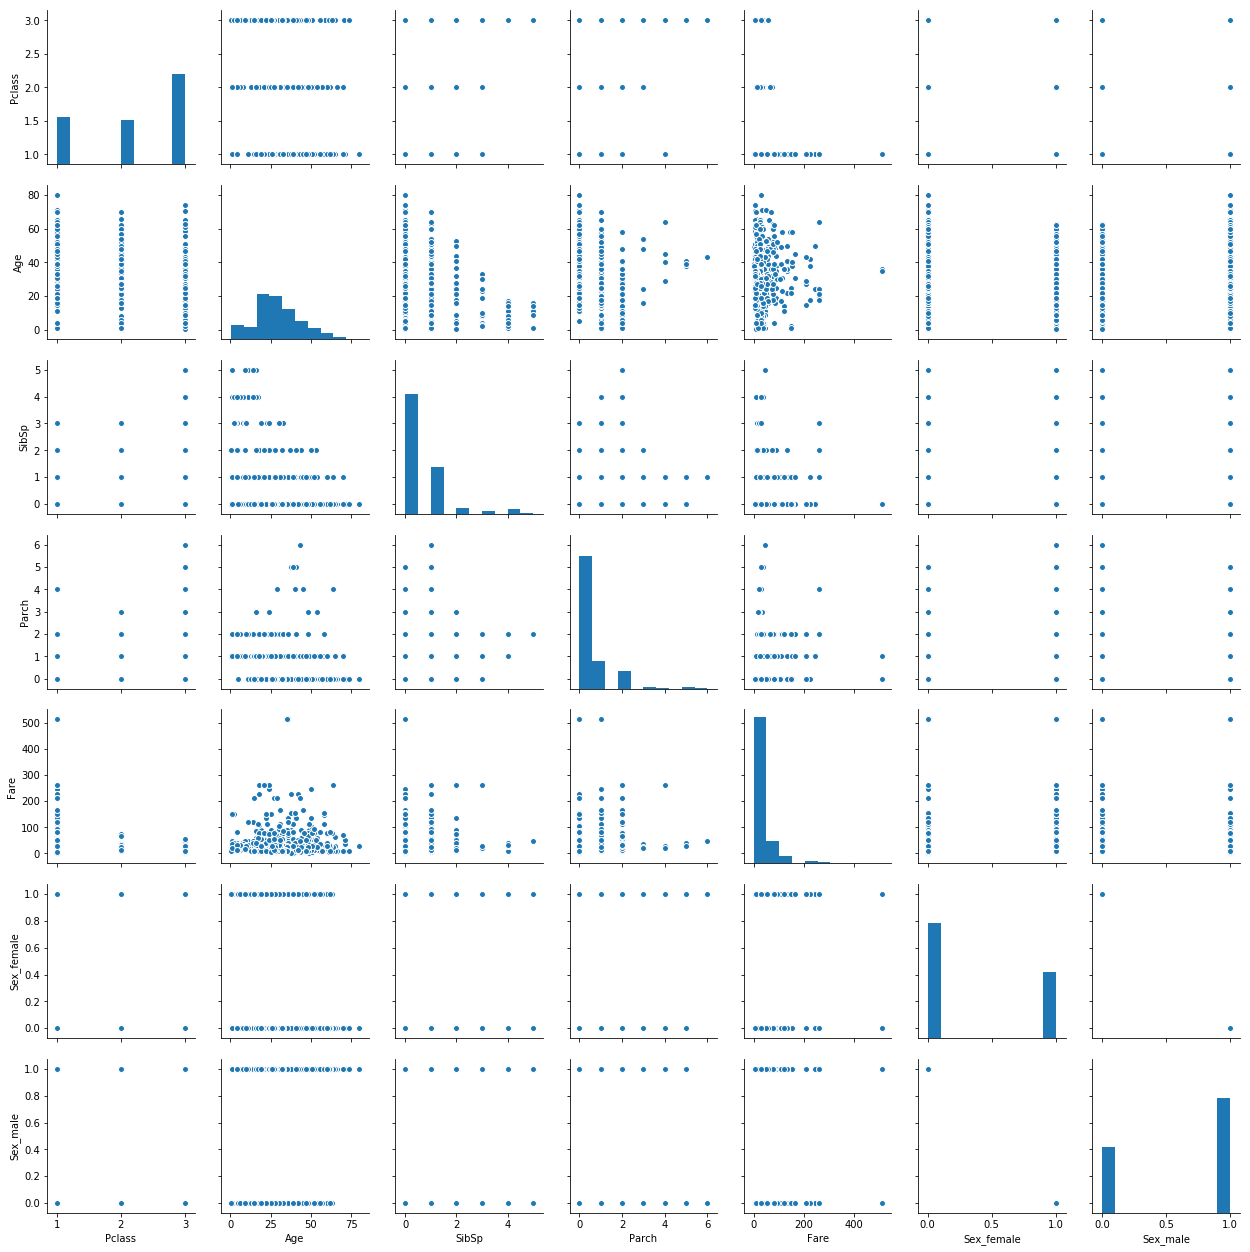

In [121]:
sns.pairplot(numeric_features)

In [27]:
scaler = StandardScaler()

In [67]:
y = numeric_features['Age']
X = numeric_features.drop(['Age'],axis=1)
X_scale = scaler.fit_transform(X)

[Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,
             ...
             880, 881, 882, 883, 884, 885, 886, 887, 889, 890],
            dtype='int64', length=714)]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=101)
y_test.describe()
y_test.head()

853    16.00
540    36.00
259    50.00
690    31.00
469     0.75
Name: Age, dtype: float64

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)

29.772846811931153


In [40]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Pclass,-5.935476
SibSp,-3.212265
Parch,-0.556454
Fare,-1.571093
Sex_female,-0.503548
Sex_male,0.503548


In [94]:
X_test_row =X_test[0]
X_test_row

array([-1.47636364, -0.55170307,  0.66686178,  0.0889811 ,  1.31743394,
       -1.31743394])

In [87]:
coeff_df.shape

(6, 1)

In [115]:
X_test_row.shape
type(X_test_row)

numpy.ndarray

In [118]:
result = coeff_df.multiply(X_test_row, axis=0)
print (result['Coefficient'].sum())

8.697478574657758


In [120]:
predictions = lm.predict(X_test)
print(predictions[0])

predictions
# plt.scatter(y_test,predictions)

38.47032538658891


array([38.47032539, 36.87891954, 31.78267362, 37.23396937, 17.98265672,
       27.97858761, 27.99839196, 41.60369751, 17.98265672, 25.8590182 ,
       31.51631137, 23.86996261, 27.97400641, 34.52008819, 28.97798415,
       22.38317456, 21.0631697 , 24.27871406, 21.0631697 , 35.76557745,
       27.97772009, 27.98291926, 41.35512705, 35.08158583, 27.18995616,
       32.82148281, 38.60212738, 25.86397077, 24.27756975, 22.21198124,
       37.17280644, 21.55914127, 30.75827826, 27.97400641, 33.36214866,
       31.06920476, 22.42922428, 27.97858761, 27.97858761, 27.997774  ,
       23.38582258, 27.97772009, 12.14973109, 37.2360728 , 34.51092578,
       27.93917496, 24.16242412, 30.09724194, 41.59589876, 28.32539843,
       22.37277624, 33.53381189, 13.61605523, 27.97772009, 31.1300879 ,
       27.95580934, 34.85192373, 27.97858761, 24.32646564, 10.05516816,
       34.91270342, 31.12266053, 34.91270342, 36.26386812, 31.02854432,
       35.79099096, 27.97982353, 16.88096143, 25.88860291, 27.20

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9.549000836808158
MSE: 153.03808347314182
RMSE: 12.370856214229548


In [70]:
y


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64